## Step 1: Import Libraries

The following libraries are used:
- **NumPy**: For numerical computations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization.
- **scikit-learn**:
  - For splitting the dataset into training and testing sets.
  - For scaling features to standardize input data.
  - For building and evaluating a binary classification model using Logistic Regression.


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score


## Step 2: Load the Dataset

The dataset is loaded using **Pandas**. Ensure the dataset contains:
- Independent variables (features).
- A binary target variable (0 or 1) for classification.

The first few rows are displayed to understand the structure of the dataset.


In [3]:
data = pd.read_csv('Campus_Selection.csv')

In [4]:

data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


## Step 3: Explore the Dataset

The dataset is explored to:
1. Check for null or missing values.
2. Understand the data types and summary statistics.
3. Analyze the distribution of the target variable to ensure balance between classes.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [6]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [7]:
data = data.drop('sl_no', axis=1) #remove unwanted columns

## Step :4 Label Encode Categorical Columns

Since some of the features and the target variable are categorical (e.g., "Placed" or "Not Placed"), we use **LabelEncoder** to convert these string values into numerical form:
- "Placed" becomes 1 and "Not Placed" becomes 0 (for the target variable).
- Similarly, categorical feature columns are also encoded.

Label encoding ensures the model can process these values as numerical data.


In [8]:
label = LabelEncoder()

In [9]:
data[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']] = data[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']].apply(label.fit_transform)

In [10]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


## Step 5: Preprocess the Dataset

**Split the Dataset**: The dataset is divided into:
   - Training set: To train the model.
   - Test set: To evaluate the model.


In [11]:
x = data.iloc[:,0:-1]

In [12]:
x.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [13]:
y = data.iloc[:,-1]

In [14]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

In [16]:
x_train.shape

(172, 12)

In [17]:
y_train.shape

(172,)

## Step 6: Train the Model

The **Logistic Regression** model is trained using the training dataset.  
This step involves the model learning the relationships between the features and the binary target variable.


In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train,y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 7: Evaluate the Model

The model's performance is evaluated using:
1. **Accuracy**: Proportion of correctly predicted instances.
2. **Classification Report**: Provides precision, recall, F1-score, and support for each class.
3. **Confusion Matrix**: Shows the count of true positives, true negatives, false positives, and false negatives.

These metrics help assess the model's effectiveness in distinguishing between the two classes.


In [20]:
y_pred = model.predict(x_test) #Predicted values

In [21]:
df = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : y_pred }
)

In [22]:
df.head(15) #Actual Vs Predicted Values

,Actual Value,Predicted Value
77,1,1
199,1,1
2,1,1
142,1,1
124,1,1
15,1,1
10,1,0
159,0,0
198,0,0
96,1,1


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8604651162790697

Confusion Matrix:
 [[ 6  3]
 [ 3 31]]


## Step 8: Visualize Results

The **Confusion Matrix** is visualized using a heatmap.  
This visualization provides a clear view of:
- True positives and true negatives.
- False positives and false negatives.

It helps identify specific areas where the model could be improved.


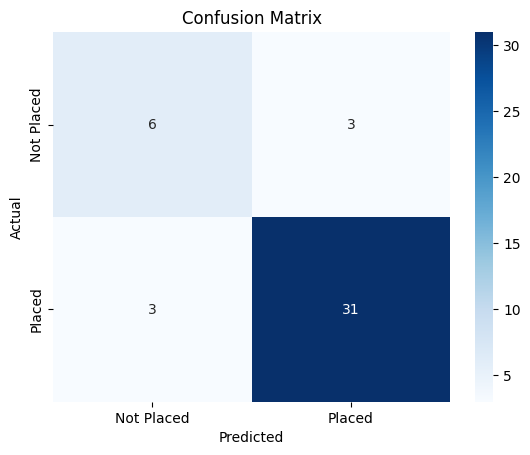

In [24]:
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 9: Save the Model

The trained model is saved using **Joblib** for future use.  
This allows reloading the model without retraining, saving time and resources.


In [25]:
# Save the model using Joblib
import joblib
joblib.dump(model, 'binary_classification_model.joblib')

print("Model saved as 'binary_classification_model.joblib'")


Model saved as 'binary_classification_model.joblib'


## Conclusion

After training and evaluating the Logistic Regression model, the accuracy score achieved on the test set is **0.86**. This means that the model correctly predicted the target variable **83%** of the time.

While this is a good starting point, there may be opportunities for further improvement, such as:
- Tuning hyperparameters to enhance model performance.
- Exploring other classification algorithms.
- Feature engineering to better capture the underlying patterns in the data.

Overall, the model has provided a reasonable prediction of whether a student will be "Placed" or "Not Placed" based on the given features, and it can be deployed for practical use.
